In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
np.random.seed(42)
n_users = 1000;

In [4]:
data = pd.DataFrame({
    "sessions_per_weak": np.random.gamma(shape=2.0,scale=2.0,size=n_users),
    "avg_session_duration": np.random.normal(loc=20, scale=8,size=n_users),
    "actions_per_session": np.random.poisson(lam=15,size=n_users),
    "days_since_last_activity": np.random.exponential(scale=10,size=n_users),
    "active_days_ratio": np.random.beta(a=2,b=5,size=n_users),
    "total_sessions": np.random.gamma(shape=3.0,scale=10.0,size=n_users)
})
data.head()

,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
0,4.787359,8.749460,12,2.722514,0.419851,9.295235
1,2.988929,19.335155,13,15.796611,0.244137,51.788786
2,2.764567,7.962237,12,6.664717,0.156314,36.349652
3,2.764605,26.080448,12,4.065340,0.432487,51.620098
4,9.299429,20.659518,17,1.129683,0.529015,31.305994


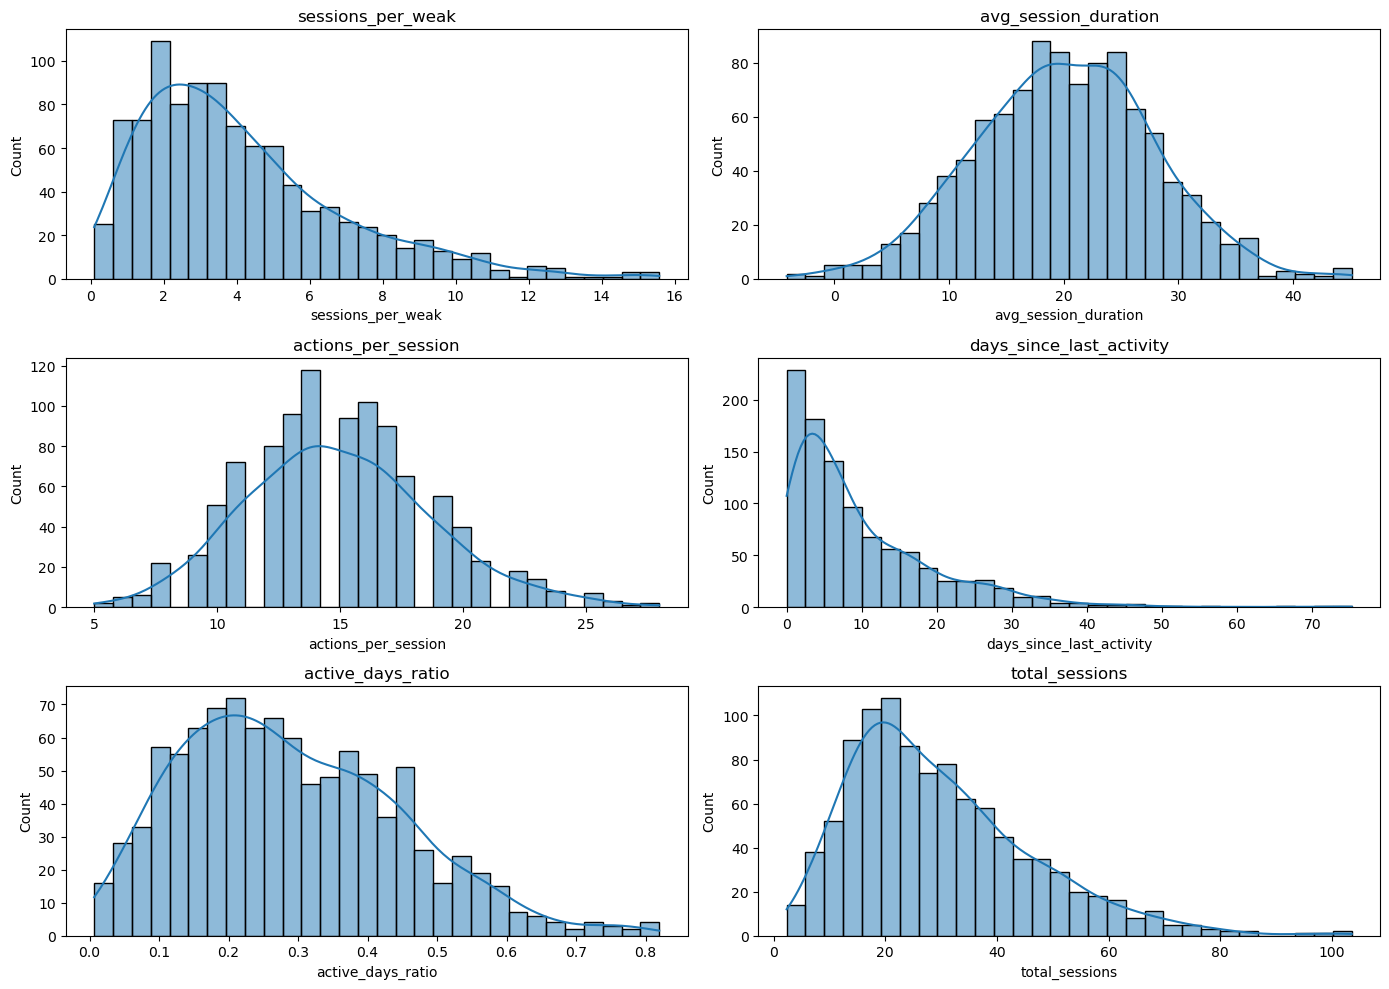

In [5]:


plt.figure(figsize=(14, 10))

for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


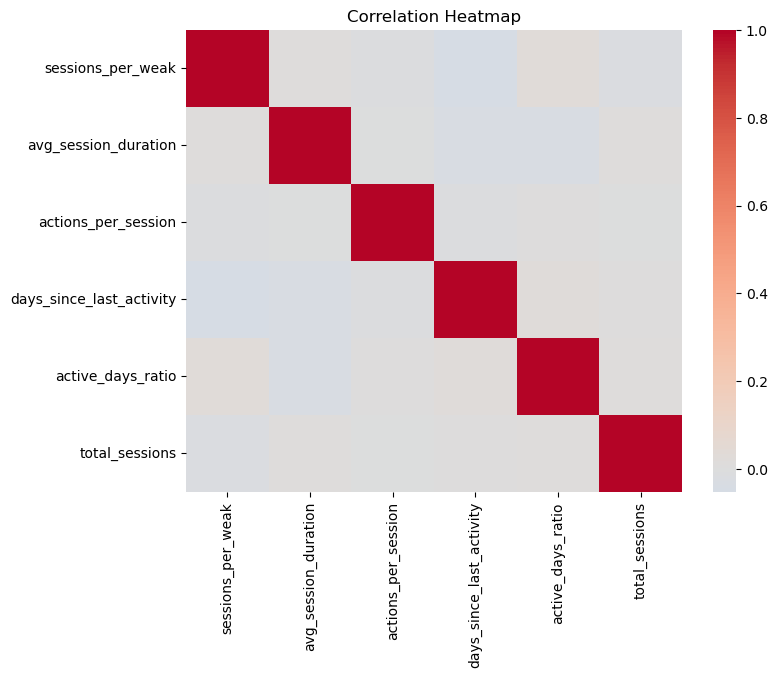

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), cmap='coolwarm',center=0,annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
data.describe()

,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.119861,20.110560,14.970000,9.804199,0.289476,29.745660
std,2.805714,7.763485,3.793612,9.869579,0.157468,16.266192
min,0.091838,-4.156097,5.000000,0.002410,0.006476,2.338531
25%,2.052423,14.858624,12.000000,2.761796,0.168013,17.861487
50%,3.458128,20.085345,15.000000,6.592864,0.268824,26.386626
75%,5.484315,25.328171,17.000000,14.124922,0.393941,38.488787
max,15.573781,45.101988,28.000000,75.252034,0.819733,103.558007


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(
    scaled_data,
    columns=data.columns
)

scaled_df.head()


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
0,0.238026,-1.464134,-0.783287,-0.717886,0.828367,-1.257864
1,-0.403283,-0.099928,-0.519554,0.607464,-0.288069,1.355828
2,-0.483289,-1.565586,-0.783287,-0.318256,-0.846068,0.406198
3,-0.483276,0.769355,-0.783287,-0.581760,0.908650,1.345452
4,1.847002,0.070746,0.535378,-0.879354,1.521956,0.095973


In [9]:
scaled_df.describe().round(2)


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.44,-3.13,-2.63,-0.99,-1.80,-1.69
25%,-0.74,-0.68,-0.78,-0.71,-0.77,-0.73
50%,-0.24,-0.00,0.01,-0.33,-0.13,-0.21
75%,0.49,0.67,0.54,0.44,0.66,0.54
max,4.08,3.22,3.44,6.63,3.37,4.54


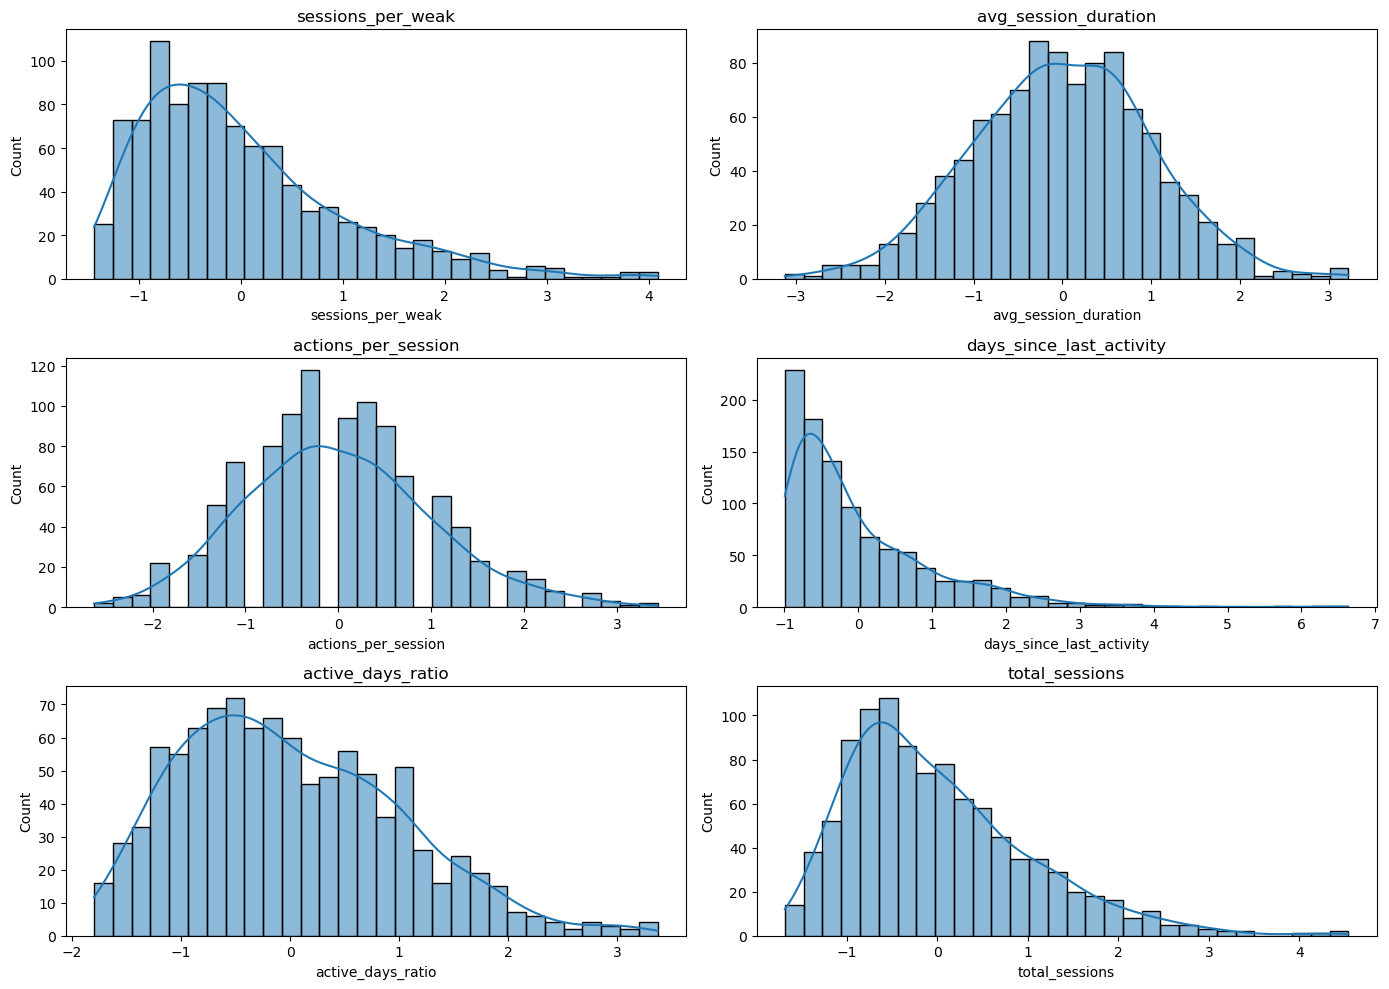

In [10]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(scaled_df.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(scaled_df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()



In [11]:
from sklearn.cluster import KMeans

inertia = []
K_range =  range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

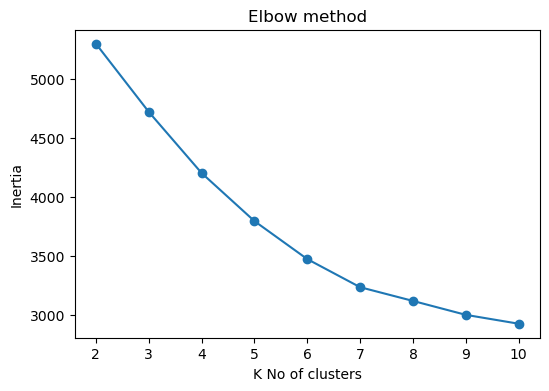

In [12]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("K No of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    sil_scores[k] = silhouette_score(scaled_df, labels)

sil_scores


c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

{2: 0.12655895480754478,
 3: 0.13788178534208492,
 4: 0.15410571203428816,
 5: 0.15137401592574423,
 6: 0.14972159628004122,
 7: 0.15013248188658718,
 8: 0.13758639444440285,
 9: 0.13847736276818795,
 10: 0.13507465040213124}

Lets have k = 4 according our shiloutette score and the elbow graph

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df)

scaled_df['cluster'] = cluster_labels


c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df.drop(columns='cluster'))

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels


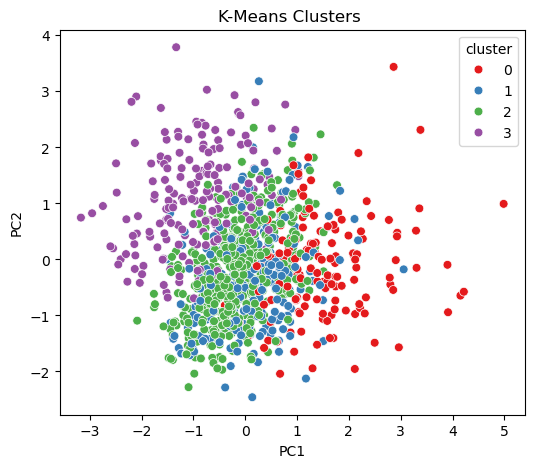

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette='Set1',
    data=pca_df,
    s=40
)
plt.title("K-Means Clusters ")
plt.show()


In [21]:
cluster_profiles = scaled_df.groupby('cluster').mean()
cluster_profiles


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions
cluster,,,,,,
0,-0.365997,-0.237457,-0.300712,1.855378,0.083183,-0.123537
1,-0.221351,0.152265,-0.069588,-0.225743,0.016039,1.369546
2,-0.435102,-0.058335,0.122373,-0.409527,-0.110016,-0.546622
3,1.611763,0.135004,0.019379,-0.147176,0.183651,-0.274445


DBSCAN
min_samples ≈ 2 × number_of_features

we have 6 features → start with 12

In [22]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(scaled_df.drop(columns='cluster', errors='ignore'))
distances, indices = neighbors_fit.kneighbors(scaled_df.drop(columns='cluster', errors='ignore'))

distances = np.sort(distances[:, -1])


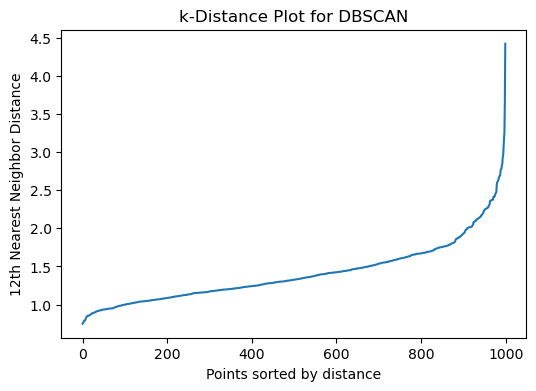

In [23]:
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("12th Nearest Neighbor Distance")
plt.title("k-Distance Plot for DBSCAN")
plt.show()


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.1, min_samples=12)
db_labels = dbscan.fit_predict(scaled_df.drop(columns='cluster', errors='ignore'))


In [43]:
scaled_df['dbscan_cluster'] = db_labels


In [44]:
scaled_df['dbscan_cluster'].value_counts()


dbscan_cluster
-1    677
 1    168
 0    126
 2     20
 3      9
Name: count, dtype: int64

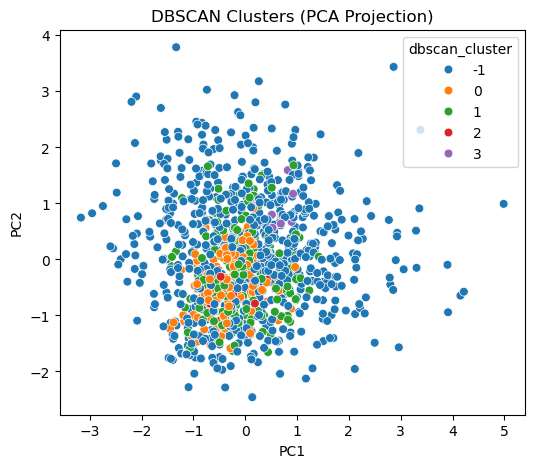

In [45]:
pca_df['dbscan_cluster'] = db_labels

plt.figure(figsize=(6,5))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='dbscan_cluster',
    palette='tab10',
    data=pca_df,
    s=40
)
plt.title("DBSCAN Clusters (PCA Projection)")
plt.show()


In [46]:
dbscan_profiles = scaled_df[scaled_df['dbscan_cluster'] != -1] \
                    .groupby('dbscan_cluster') \
                    .mean()

dbscan_profiles


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions,cluster
dbscan_cluster,,,,,,,
0,-0.485262,0.109273,0.056054,-0.564077,-0.170073,-0.322220,1.873016
1,-0.294150,-0.323693,-0.328034,-0.284745,-0.379783,-0.413121,1.851190
2,-0.728722,0.900638,1.076030,-0.454912,0.157482,0.055543,1.750000
3,-0.426870,-1.513106,0.388860,-0.678152,0.663005,-0.446617,2.000000


In [47]:
noise_users = scaled_df[scaled_df['dbscan_cluster'] == -1]
noise_users.describe()


,sessions_per_weak,avg_session_duration,actions_per_session,days_since_last_activity,active_days_ratio,total_sessions,cluster,dbscan_cluster
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.0
mean,0.190512,0.053497,0.034013,0.198098,0.112431,0.166784,1.586411,-1.0
std,1.115353,1.102895,1.100396,1.126577,1.072288,1.082677,1.072929,0.0
min,-1.426013,-3.127307,-2.629417,-0.992424,-1.798090,-1.635153,0.000000,-1.0
25%,-0.705317,-0.710890,-0.783287,-0.667610,-0.740242,-0.679890,1.000000,-1.0
50%,-0.028812,0.090764,0.007912,-0.175131,-0.043033,0.012926,2.000000,-1.0
75%,0.875663,0.799254,0.799111,0.790099,0.880213,0.830988,3.000000,-1.0
max,4.084397,3.220710,3.436440,6.634587,3.369090,4.540047,3.000000,-1.0


In [48]:
comparison = scaled_df[['cluster', 'dbscan_cluster']]
comparison.head()


,cluster,dbscan_cluster
0,2,-1
1,1,-1
2,2,-1
3,1,-1
4,3,-1


In [49]:
pd.crosstab(
    scaled_df['cluster'],
    scaled_df['dbscan_cluster'],
    normalize='index'
)


dbscan_cluster,-1,0,1,2,3
cluster,,,,,
0,0.950355,0.000000,0.049645,0.000000,0.000000
1,0.811404,0.070175,0.096491,0.021930,0.000000
2,0.413870,0.246085,0.286353,0.033557,0.020134
3,0.940217,0.000000,0.059783,0.000000,0.000000
